In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import re

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
my_aggfunc = lambda x: x.to_list()

In [ ]:
andic_dicts = pd.read_csv('data/andic_dicts.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,7,10,17,19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# some values in 'bor'-column are not int
andic_dicts['bor'] = andic_dicts['bor'].notna().astype(int)

In [ ]:
def yo(x):
  if type(x) == str:
    return x.replace('ё', "е").strip()
  else:
    return x
andic_dicts['meaning_ru'] = andic_dicts['meaning_ru'].apply(yo)

In [ ]:
andic_dicts

,,id_word,id_meaning,id,lemma,ipa,morphology,bor,annotator,pos,concepticon,meaning_ru,definition,glottocode,reference,comments,borrowing_source_word,borrowing_source_comment,"74,52%",Unnamed: 19
0,botl1242,1,1,1.0,а:хх,NaN,NaN,0,George Moroz,intj,NaN,баю-бай,баю-бай,botl1242,"Saidova, Abusov 2012",NaN,NaN,NaN,4473.0,NaN
1,NaN,2,1,2.0,аᴴгь/а́й,NaN,NaN,0,George Moroz,verb,NaN,сообщать,"понуд. от аᴴгьи; 1) сообщать, доводить до свед...",botl1242,"Saidova, Abusov 2012",NaN,NaN,NaN,9449.0,NaN
2,NaN,2,2,3.0,аᴴгь/а́й,NaN,NaN,0,George Moroz,verb,NaN,объявлять,"понуд. от аᴴгьи; 1) сообщать, доводить до свед...",botl1242,"Saidova, Abusov 2012",NaN,NaN,NaN,12706.0,NaN
3,NaN,2,3,4.0,аᴴгь/а́й,NaN,NaN,0,George Moroz,verb,NaN,нанимать,"понуд. от аᴴгьи; 1) сообщать, доводить до свед...",botl1242,"Saidova, Abusov 2012",NaN,NaN,NaN,6868.0,NaN
4,NaN,2,4,5.0,аᴴгь/а́й,NaN,NaN,0,George Moroz,verb,NaN,предупреждать,"понуд. от аᴴгьи; 1) сообщать, доводить до свед...",botl1242,"Saidova, Abusov 2012",NaN,NaN,NaN,12724.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84312,NaN,5380,1,35076.0,ЪОХ|/А¯'ЛЪА,ʔ-o-χʼ-'aː-ɬ-a,"(-ё, -ас, -ёй, -ебхва, -еда)",0,Gregory Kuznetsov,NaN,NaN,кашлять,кашлять; дийа ъох|алъа кьваᴴи бе-хьуда я много...,kara1474,"Magomedova, Khalidov 2001",NaN,NaN,NaN,NaN,NaN
84313,NaN,5381,1,35077.0,ЪО'Х|О,ʔ-'o-χʼ-o,(-л|),0,Gregory Kuznetsov,NaN,NaN,кашель,iii (-л|) кашель; каъа-маъас ъохю легкий кашел...,kara1474,"Magomedova, Khalidov 2001",NaN,NaN,NaN,NaN,NaN
84314,NaN,5382,1,35078.0,ЪОЪО'Б/АЛЪА,ʔ-o-ʔ-'o-b-a-ɬ-a,"(-е, -ас, -а, -ебхва, -да)",0,Gregory Kuznetsov,NaN,NaN,качать колыбель,качать {колыбель); кене ъоъобалъа качать люльку,kara1474,"Magomedova, Khalidov 2001",NaN,NaN,NaN,NaN,NaN
84315,NaN,5383,1,35079.0,ЪОЪО'Л,ʔ-o-ʔ-'o-l,"(-ол|, -ди)",0,Gregory Kuznetsov,NaN,NaN,деревянный ящик,"iii (-ол|, -ди) 1) деревянный ящик {с отсеками...",kara1474,"Magomedova, Khalidov 2001",NaN,NaN,NaN,NaN,NaN


In [ ]:
# here i try to replace all bad ipa_tokens at once
def hyphen_repl(x):
    x = re.sub('\-{2,}', '-', x)
    x = re.sub(',', '', x)
    return x

def akhv_repl(x):
    x = re.sub('g', 'ɡ', x)
    x = re.sub("ћ", "ħ", x)
    x = re.sub('͡', '', x)
    return hyphen_repl(x)

def bagv_repl(x):
    x = re.sub('[\(\)\.\dа-яА-Яōé]', '', x)
    x = re.sub('͡', '', x)
    x = re.sub("a’", "a'", x)
    return hyphen_repl(x)

def cham_repl(x):
    x = re.sub('g', 'ɡ', x)
    x = re.sub('ã', 'ã', x)
    x = re.sub('ĩ', 'ĩ', x)
    x = re.sub('õ', 'õ', x)
    x = re.sub('ũ', 'ũ', x)
    x = re.sub('ẽ', 'ẽ', x)
    x = re.sub("'", "ʼ", x)
    x = re.sub("\*", "'", x)
    x = re.sub(':', "ː", x)
    return hyphen_repl(x)

def ghod_repl(x):
    x = re.sub('[ IЮЯ,]', "", x)
    x = re.sub('\uf009', '', x)
    x = re.sub('\xad', '', x)
    x = re.sub("-'-", "-", x)
    x = re.sub("'", "ʼ", x)
    x = re.sub("\*", "'", x)
    x = x.replace(":", "")
    return hyphen_repl(x)

def kara_repl(x):
    x = re.sub("\-'\-", "-", x)
    x = re.sub('ɕ', 'ʃ', x)
    x = re.sub("о", "o", x)
    x = re.sub(r"\-'([^\-]+)\-", r"-\g<1>'-", x)

    return hyphen_repl(x)

def tind_repl(x):
    x = re.sub('ã', 'ã', x)
    x = re.sub('ĩ', 'ĩ', x)
    x = re.sub('õ', 'õ', x)
    x = re.sub('ũ', 'ũ', x)
    x = re.sub('ẽ', 'ẽ', x)
    x = re.sub('ç', 'x', x)
    x = re.sub('<', '', x)
    return hyphen_repl(x)

def toki_repl(x):
    x = re.sub('ɕ', 'ʃ', x)
    x = re.sub(r"\-'([^\-]+)\-", r"-\g<1>'-", x)
    return hyphen_repl(x)

In [ ]:
func_dict = {
    'akhv1239': akhv_repl,
    'bagv1239': bagv_repl,
    'cham1309': cham_repl,
    'ghod1238': ghod_repl,
    'kara1474': kara_repl,
    'tind1238': tind_repl,
    'toki1238': toki_repl
}

In [ ]:
def ipa_repl(x, func_dict=func_dict):
    if x['glottocode'] in func_dict:
        if type(x['ipa']) == str:
            return func_dict[x['glottocode']](x['ipa'])
        else:
            return x['ipa']
    else:
        return x['ipa']

In [ ]:
andic_dicts_ipa = andic_dicts.apply(ipa_repl, axis=1)
andic_dicts['ipa'] = andic_dicts_ipa

In [ ]:
df = andic_dicts[['lemma ', 'ipa', 'bor', 'pos', 'meaning_ru', 'definition', 'glottocode']]


In [ ]:
Counter(andic_dicts['glottocode'].to_list())

Counter({'akhv1239': 14001,
         'andi1255': 6146,
         'bagv1239': 12706,
         'botl1242': 15951,
         'cham1309': 8496,
         'ghod1238': 7425,
         'kara1474': 6651,
         'tind1238': 12724,
         'toki1238': 217})

In [ ]:
Counter(andic_dicts[andic_dicts['bor'] == 1]['glottocode'].to_list())

Counter({'akhv1239': 447,
         'bagv1239': 692,
         'botl1242': 701,
         'ghod1238': 730,
         'kara1474': 54,
         'tind1238': 309,
         'toki1238': 1})

In [ ]:
akhvakh = pd.read_csv('data/akhvakhDBv5.csv')

In [ ]:
akhvakh

,id_word,id_meaning,lemma_source,lemma_ipa,morphology,bor,annotator,pos,concepticon,meaning_ru,definition,glottolog,reference,comments,borrowing_source_word
0,1,1,аба'далIи,a-b-a'-d-a-t͡ɬː-i,NaN,NaN,Arseniy Averin,adj,everlasting,вечный,вечный; нескончаемый; *абадалIи чIили* загробн...,akhv1239,"Magomedova, Abdulayeva 2007",NaN,NaN
1,2,1,а/б/а'жве,a-b-a'-ʒʷ-e,(-ролIи),NaN,Arseniy Averin,noun,sociability,общительность,общительность; *абажве голъIа аᴴде* необщитель...,akhv1239,"Magomedova, Abdulayeva 2007",NaN,NaN
2,3,1,а/б/ажу'рулъIа,a-b-a-ʒ-u'-r-u-t͡ɬ-a,"(абажвари', аба-жу'ва, абажва', абажве̄'гье, а...",NaN,Arseniy Averin,verb,NaN,общаться,1) общаться; поддерживать отношения; *чес̄уга-...,akhv1239,"Magomedova, Abdulayeva 2007",NaN,NaN
3,3,2,а/б/ажу'рулъIа,a-b-a-ʒ-u'-r-u-t͡ɬ-a,"(абажвари', аба-жу'ва, абажва', абажве̄'гье, а...",NaN,Arseniy Averin,verb,NaN,привязываться,1) общаться; поддерживать отношения; *чес̄уга-...,akhv1239,"Magomedova, Abdulayeva 2007",NaN,NaN
4,3,3,а/б/ажу'рулъIа,a-b-a-ʒ-u'-r-u-t͡ɬ-a,"(абажвари', аба-жу'ва, абажва', абажве̄'гье, а...",NaN,Arseniy Averin,verb,NaN,набрасываться,1) общаться; поддерживать отношения; *чес̄уга-...,akhv1239,"Magomedova, Abdulayeva 2007",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13996,8004,2,э'лъ̄о̄/нулъIа,e'-ɬː-oː-n-u-t͡ɬ-a,"(-а̄ни, -ва, -айа, -айе̄гье, -а̄не)",NaN,Arseniy Averin,verb,NaN,имитировать,"уподоблять _кому-чему-л._, делать _что-л._ пох...",akhv1239,"Magomedova, Abdulayeva 2007",NaN,NaN
13997,8005,1,эᴴ'лъ̄у/нулъIа,ẽ'-ɬː-u-n-u-t͡ɬ-a,"(-ани, -ва, -акьа', -е̄гье, -е̄не)",NaN,Arseniy Averin,verb,NaN,походить,походить на кого-л.; уподобляться _кому-чему-л...,akhv1239,"Magomedova, Abdulayeva 2007",NaN,NaN
13998,8005,2,эᴴ'лъ̄у/нулъIа,ẽ'-ɬː-u-n-u-t͡ɬ-a,"(-ани, -ва, -акьа', -е̄гье, -е̄не)",NaN,Arseniy Averin,verb,NaN,уподобляться,походить на кого-л.; уподобляться _кому-чему-л...,akhv1239,"Magomedova, Abdulayeva 2007",NaN,NaN
13999,8006,1,э'лъ̄у/нулъIа,e'-ɬː-u-n-u-t͡ɬ-a,"(-ани, -ва, -акьа', -е̄гье, -е̄не)",NaN,Arseniy Averin,verb,NaN,походить,походить на кого-л.; уподобляться _кому-чему-л...,akhv1239,"Magomedova, Abdulayeva 2007",NaN,NaN


In [ ]:
for idx, row in akhvakh.iterrows():
  bwordd = 0
  if row['lemma_source'].startswith('б'):
    bwordd = idx
  if row['lemma_source'].startswith('м') and idx - bwordd == 1:
    print(bwordd)

In [ ]:
pivot_ipa = df.pivot_table(index='meaning_ru', columns='glottocode', values='ipa', aggfunc=my_aggfunc)
#pivot_idx = df.pivot_table(index='meaning_ru', columns='glottocode', values=df.index.to_list(), aggfunc=my_aggfunc)

In [ ]:
pivot_ipa.loc[['базарная площадь']]

glottocode,akhv1239,andi1255,bagv1239,botl1242,cham1309,ghod1238,kara1474,tind1238,toki1238
meaning_ru,,,,,,,,,
базарная площадь,NaN,NaN,NaN,"[nan, nan]",[b-a-z-a'-r-b-a-j-d-ã],[b-a-z-a'-r-b-a-j-d-a'-n],NaN,NaN,NaN


In [ ]:
#def nan_list(x):
#  if type(x) == list:
#    checklist = []
#    for i in x:
#      if 'nan' == str(i):
#        checklist.append(i)
#    if len(x) == len(checklist):
#      return np.nan
#    else:
#      return x
#  else:
#    return x

In [ ]:
# aggfunc listed some non-values incorrectly, fixing it here
def nan_list(x):
  if type(x) == list:
    new_list = []
    for i in x:
      if type(i) == str:
        new_list.append(i)
    if len(new_list) > 0:
      return new_list
    else:
      return np.nan
  else:
    return x

In [ ]:
pivot_ipa = pivot_ipa.applymap(nan_list)

In [ ]:
pivot_ipa.sample(20)

glottocode,akhv1239,andi1255,bagv1239,botl1242,cham1309,ghod1238,kara1474,tind1238,toki1238
meaning_ru,,,,,,,,,
стать корявым,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"резать, забивать (скот, птицу)",NaN,NaN,"[b-u'-qχ-u-l-a, b-u-qχ-u'-qχ-u-l-a]",NaN,NaN,NaN,NaN,NaN,NaN
вопрос,[s-u-ʔ-a],NaN,"[m-a-s-a'-l-a, s-u-a'-l]",NaN,NaN,[s-u-a'-l],[s-u'-ʔ-a-l],"[m-a-s-a'-l-a, m-a-s-ʔ-a'-l-a, s-u-a'-l]",NaN
придание вкуса,[m-i'-ts’ː-a-r-a-j-e],NaN,[m-i-sː'-a'-l-h-a-l-a-r],NaN,NaN,NaN,NaN,NaN,NaN
"объяснять, истолковывать",NaN,NaN,NaN,NaN,NaN,NaN,[b-i-tʃʼː-e-b-i-qʼ-aː'-ɬ-a],NaN,NaN
европейцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
быть нужным,[qχ’ʷː-a'-r-a-ʕ-u-n-u-tɬ-a],NaN,NaN,NaN,NaN,[ħ-a-ʒ-a-ɬ-i'],NaN,[qʼ-oˌ-tʃ-ĩ-ɬʲ-a],NaN
голенище,[n-i-kʷ-a'],NaN,[qχ'ʷ-ã'-qχ'ʷ-a],NaN,NaN,[tɬʼ-a'-n-u],[n-u-k-'u],[qʼ-a'-r-u],NaN
расчлениться многократно,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
pivot_ipa['occured_in'] = pivot_ipa.count(axis=1)

In [ ]:
occure_list = pivot_ipa['occured_in'].to_list()
len(occure_list)

28893

In [ ]:
c = Counter(occure_list)

In [ ]:
import matplotlib.pyplot as plt

<BarContainer object of 7 artists>

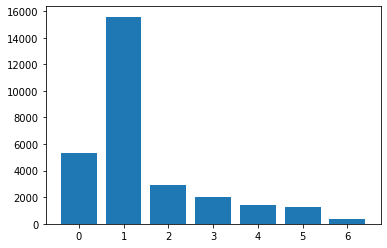

In [ ]:
plt.bar(
    list(c.keys()),
    list(c.values())   
)

In [ ]:
c

Counter({0: 5329, 1: 15581, 2: 2907, 3: 2006, 4: 1428, 5: 1261, 6: 381})

In [ ]:
# cognate recognition model requieres some extra data editing
def to_turch(x):
  
        x = re.sub("['ː̃ʷʼ’ʲˌ̄,]", '', x)
        x = re.sub("qχ", 'q', x)
        x = re.sub("о", "o", x)
        x = re.sub("ћ", "ħ", x)
        x = re.sub(r"d([zʒ])", r"d͡\g<1>", x)
        x = re.sub(r"t([ʃsɕ])", r"t͡\g<1>", x)
        # this one is very contraversioal, might do smth after
        x = re.sub("tɬ", "ɬ", x)
        return x


def to_turch_map(y):
    if type(y) == list:
      l = []
      for x in y:
        x = re.sub("['ː̃ʷʼ’ʲˌ̄,]", '', x)
        x = re.sub("qχ", 'q', x)
        x = re.sub("о", "o", x)
        x = re.sub("ћ", "ħ", x)
        x = re.sub(r"d([zʒ])", r"d͡\g<1>", x)
        x = re.sub(r"t([ʃsɕ])", r"t͡\g<1>", x)
        # this one is very contraversioal, might do smth after
        x = re.sub("tɬ", "ɬ", x)
        l.append(x)
      return l
    else:
      return y

In [ ]:
test_ipa_p = pivot_ipa[pivot_ipa['occured_in'] == 6].head(20)

In [ ]:
test_ipa_p

glottocode,akhv1239,andi1255,bagv1239,botl1242,cham1309,ghod1238,kara1474,tind1238,toki1238,occured_in
meaning_ru,,,,,,,,,,
аккуратный,"[ʕ-u'-ts’ː-i-l-aː-d-a-b-e, m-a'-ts’ː-a-d-a-b-e...",NaN,"[b-a'-sː'-a-d-a-b-b-a'-sː'-a-r-a-b, w-a-r-a'-ʕ...",NaN,[b-a'-sʼː-a-d-a-b],"[qʼ-a-tʃʼ-i-kʼʲ-a-tʼ-a'-h-ĩ-b-u, m-u-ħ-kʲ-a'-...",[b-a'-tsʼː-a-d-o-b],"[b-a'-tsː-a-j-a-b, w-a-r-a'-ʕ-a-b, qʼ-a-r-a'-l...",NaN,6
балхарцы,[b-a-qχː-a-l-i-d-o],NaN,[b-a'-r-qχ-a-l-i-sː-a-d-i],NaN,[b-a'-qχ-a-r-a-l-i],[b-a-l-χ-a'-r-a-l],[b-a'-qχ-a-r-d-i],[b-a'-q-a-r-aː-j-i],NaN,6
беднеть,"[j-a-z-i'-qχː-i-ɬ-i-l-oː-r-u-tɬ-a, j-a-z-i'-qχ...",NaN,[b-i-s-k-i'-n-l-h-i-l-a],NaN,"[b-i-s-k-ĩ'-ɬ-l-a, b-i-s-k-ĩ'-ɬ-iː-l-a]","[b-i-s-kʲ-i-n-ɬ-i', j-a-z-i-qχ-ɬ-i']",[j-a-z-i-qχ-ɬ-a-ɬ-'a],[b-i-sː-k-ĩ'-ɬ-i-ɬʲ-a],NaN,6
бедность,[m-i-ʃ-t-i'-ɬ-i-l-a-j-e],NaN,[b-i-s-k-i'-n-l-h-a-r],NaN,[b-i-s-k-ĩ'-ɬ-i],"[b-i-s-kʲ-i'-n-ɬ-i, j-a-z-i'-qχ-i-ɬ-i, m-i-s-k...",[b-i-s-k-ĩ-ɬ-e-r],[b-i-sː-k-ĩ'-ɬ-a-r],NaN,6
бедный,"[j-a-z-i'-qχː-e-d-a-b-e, j-a-z-i'-qχː-aː-b-e, ...",NaN,"[b-i-s-k-i'-n-a-b, p-a-qχ'-i'-r-a-b]",NaN,[b-i-s-k-i'-n-a-b],"[b-i-s-kʲ-i'-n-a-b, j-a-z-i'-qχ-a-b, m-i-s-kʲ-...",[b-i-s-k-i-n-o'-b],[b-i-sː-k-i'-n-a-b],NaN,6
белоснежный,[ã-ʒ-i-k-u'-b-a-ʃ-i-d-a-b-e],NaN,[ã-z-i-h-a-ts'-a'-b],NaN,[ã-z-i'-h-a-tsʼ-a-b],[a-n-z-i'-h-a-tsʼ-a-b],[ã-z-e-ʔ-o-h-a-tsʼ-a'-b],[ã-z-i'-ʁ-a-tsʼ-a-b],NaN,6
беременная,[m-u'-tɬʼː-i-d-a-b-e],NaN,[qχ'-i-n-u'-b],NaN,"[b-aˌ-χ-n-a-tɬ-a-b, b-aˌ-χ-n-a-tɬ-a-b]","[j-a-χ-ĩ', j-a-χ-ĩ']",[qʼ-e'-n-o-b],[qʼ-e-n-u'-b],NaN,6
беспорядок,"[ʕ-a-ʒ-u'-ʒ-i-m-a-ʒ-u-ʒ-i, ħ-a-p-u'-tʃ-a-p-u, ...",NaN,"[b-a-z-a'-r, tʃ-a'-l̄-ʔ-a-χː-a-r, tʃ-u'-r-p-a]",NaN,[b-a-d-a'-ʁ-u-d-u-r],"[b-a-d-a'-ʁ-u-d-u-r, b-a-z-a'-r, ħ-a-p-u'-tʃ-a...",[b-a-d-a'-h-u-d-u-r],"[tʃ-a-r-tɬ-a-χː-a'-r, tʃ-u'-r-p-a, tʃ-o-r-p-a]",NaN,6
богатеть,"[m-a-tʃ-aː-ɬ-u'-r-u-tɬ-a, m-a-tʃ-aː-ɬ-u'-n-u-t...",NaN,[b-e-tʃ-e'-l-h-i-l-a],NaN,"[b-e-tʃ-e'-ɬ-l-a, b-e-tʃ-e-ɬ-iː-l-a]",[b-e-tʃ-e-ɬ-i'],[b-e-tʃ-e'-ɬ-a-ɬ-a],"[m-i-tʃ-aː'-ɬ-i-ɬʲ-a, m-ĩ-tʃ-aː'-ɬ-i-ɬʲ-a]",NaN,6


In [ ]:
!pip install lingpy
import lingpy as lp
from lingpy.align.pairwise import turchin

     |████████████████████████████████| 542kB 6.8MB/s 
     |████████████████████████████████| 194kB 32.4MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 563kB 26.7MB/s 
  Created wheel for lingpy: filename=lingpy-2.6.7-cp37-none-any.whl size=589564 sha256=586c8870255a440b22f7e11a22f73d705fcacf45896699f9642acd0944c07c49
  Stored in directory: /root/.cache/pip/wheels/2a/92/c1/427c956522b6a64dd5eff07d35fe6067e6ba5c5a649618a966
Successfully built lingpy


2021-05-21 13:47:21,889 [INFO] Compiling diacritics and vowels...
2021-05-21 13:47:21,893 [INFO] Diacritics and sound classes were successfully compiled.
2021-05-21 13:47:21,896 [INFO] Compiling model <asjp>...
2021-05-21 13:47:21,900 [INFO] ('ǃ', '!')
2021-05-21 13:47:21,903 [INFO] ('ǂ', '!')
2021-05-21 13:47:21,905 [INFO] ('ǁ', '!')
2021-05-21 13:47:21,908 [INFO] ('ǀ', '!')
2021-05-21 13:47:21,911 [INFO] ('ʘ', '!')
2021-05-21 13:47:21,913 [INFO] ('gǃ', '!')
2021-05-21 13:47:21,916 [INFO] ('gǂ', '!')
2021-05-21 13:47:21,918 [INFO] ('gǁ', '!')
2021-05-21 13:47:21,920 [INFO] ('gǀ', '!')
2021-05-21 13:47:21,923 [INFO] ('gʘ', '!')
2021-05-21 13:47:21,925 [INFO] ('ǃŋ', '!')
2021-05-21 13:47:21,928 [INFO] ('ǂŋ', '!')
2021-05-21 13:47:21,930 [INFO] ('ǁŋ', '!')
2021-05-21 13:47:21,932 [INFO] ('ǀŋ', '!')
2021-05-21 13:47:21,935 [INFO] ('ʘŋ', '!')
2021-05-21 13:47:21,937 [INFO] ('!', '!')
2021-05-21 13:47:21,940 [INFO] ('|', '!')
2021-05-21 13:47:21,942 [INFO] ('g!', '!')
2021-05-21 13:47:21,94

In [ ]:

def row_turchin(w, x, langs=list(pivot_ipa.columns)):
    l_dict = {}
    ips = x[:len(langs)]

    match_d = {}
    match_D = {
        "bword": [],
        "aword": [],
        "blang": [],
        "alang": []
    }

    for i, cell in enumerate(ips):
      if type(cell) == list:
        l_dict[langs[i]] = cell
    lng = list(l_dict.keys())
    #print(l_dict)
    for i, lang in enumerate(lng[:-1]):
      wlist = l_dict[lang]
      for aword in wlist:
        for slang in lng[i+1:]:
          for bword in l_dict[slang]:
            if bword not in match_d:
              #print(aword, bword)
              ## if not used to_turch_map before:
              AWORD = to_turch(aword)
              BWORD = to_turch(bword)
              ## endif
              if turchin(AWORD.split("-"), BWORD.split("-")) == 0:
                match_d[bword] = aword
                match_D['bword'].append(bword)
                match_D['aword'].append(aword)
                match_D['blang'].append(slang)
                match_D['alang'].append(lang)

    #print(match_D)
    key_words = list(set(list(match_d.values())))
    output = {}
    for i, kw in enumerate(key_words, start=1):
      outKey = w + "_" + str(i)
      iter_out = {}
      indices = [j for j, x in enumerate(match_D['aword']) if x == kw]
      iter_out[match_D['alang'][indices[0]]] = [match_D['aword'][indices[0]]]
      for idx in indices:
        lang = match_D['blang'][idx]
        word = match_D['bword'][idx]
        if lang in iter_out:
          iter_out[lang].append(word)
        else:
          iter_out[lang] = [word]
      output[outKey] = iter_out
    return output

In [ ]:
global_turchin = {}

for ruword, row in pivot_ipa[pivot_ipa['occured_in'] > 2].iterrows():
  global_turchin.update(row_turchin(ruword, row))

#for ruword, row in test_ipa_p.applymap(to_turch_map).iterrows():
#  global_turchin.update(row_turchin(ruword, row))

In [ ]:
LANGS = list(pivot_ipa.columns)[:-1]

In [ ]:
len(global_turchin)

5971

In [ ]:
glob_turch = {}

for ruword in global_turchin:
  row = global_turchin[ruword]
  new_row = {}
  for lang in LANGS:
    if lang in row:
      new_row[lang] = row[lang]
    else:
      new_row[lang] = np.nan
  glob_turch[ruword] = new_row

In [ ]:
cognates_turchin = pd.DataFrame.from_dict(glob_turch, orient='index')

In [ ]:
cognates_turchin.dropna(axis=1, how='all')

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238
Аллах_1,[a-lː-a'-h-i],NaN,NaN,[a-l-l-a'-h],[a-l-a'-h-b-e-tʼ-e-r-h-a-n],NaN
Бика_1,[b-i-k-a'],NaN,[b-iˌ-k-a],NaN,NaN,[b-i'-k-a]
Галбац_1,NaN,NaN,[ʁ-a'-l-b-a-tsʼ],[ʁ-a'-l-b-a-tsʼ-i],NaN,NaN
Дибир_1,[d-i'-b-i],NaN,NaN,[d-i-b-i'-r],NaN,[d-iˌ-b-i-r]
Коран_1,[qχ’ː-u'-r-ũ-ʕ-a],[qχ'-o-r-a'-n],NaN,[qʼ-u-r-ʕ-e'-n],NaN,[qʼ-o-r-a'-m]
...,...,...,...,...,...,...
ячмень (болезнь)_1,NaN,[b-e-tʃ'-i'-n],NaN,[b-e-tʃʼ-i'-n],[b-e-tʃʼ-ĩ'-qʼ-o],NaN
ящерица_1,[k’-ã'-ts’ː-a-r-a],NaN,NaN,NaN,NaN,[kʼʲ-ã'-tʃː-i]
ящик_1,[j-a-ʃː-i'-k-i],[j-a'-ʃ-i-k'],NaN,[j-a-ʃ-i'-kʼʲ-i],[j-a-ʃː-i'-kʼ],NaN
ящур_1,[j-a'-ʃː-u-r-i],NaN,NaN,[j-a'-ʃː-u-r],[j-a-ʃː-u'-r],NaN


In [ ]:
cognates_turchin['rus'] = cognates_turchin.index
cognates_turchin['rus'] = cognates_turchin['rus'].apply(lambda x: x.split('_')[0])


In [ ]:
cognates_turchin = cognates_turchin.dropna(axis=1, how='all')

In [ ]:
cognates_turchin

,akhv1239,bagv1239,cham1309,ghod1238,kara1474,tind1238,rus
Аллах_1,[a-lː-a'-h-i],NaN,NaN,[a-l-l-a'-h],[a-l-a'-h-b-e-tʼ-e-r-h-a-n],NaN,Аллах
Бика_1,[b-i-k-a'],NaN,[b-iˌ-k-a],NaN,NaN,[b-i'-k-a],Бика
Галбац_1,NaN,NaN,[ʁ-a'-l-b-a-tsʼ],[ʁ-a'-l-b-a-tsʼ-i],NaN,NaN,Галбац
Дибир_1,[d-i'-b-i],NaN,NaN,[d-i-b-i'-r],NaN,[d-iˌ-b-i-r],Дибир
Коран_1,[qχ’ː-u'-r-ũ-ʕ-a],[qχ'-o-r-a'-n],NaN,[qʼ-u-r-ʕ-e'-n],NaN,[qʼ-o-r-a'-m],Коран
...,...,...,...,...,...,...,...
ячмень (болезнь)_1,NaN,[b-e-tʃ'-i'-n],NaN,[b-e-tʃʼ-i'-n],[b-e-tʃʼ-ĩ'-qʼ-o],NaN,ячмень (болезнь)
ящерица_1,[k’-ã'-ts’ː-a-r-a],NaN,NaN,NaN,NaN,[kʼʲ-ã'-tʃː-i],ящерица
ящик_1,[j-a-ʃː-i'-k-i],[j-a'-ʃ-i-k'],NaN,[j-a-ʃ-i'-kʼʲ-i],[j-a-ʃː-i'-kʼ],NaN,ящик
ящур_1,[j-a'-ʃː-u-r-i],NaN,NaN,[j-a'-ʃː-u-r],[j-a-ʃː-u'-r],NaN,ящур


In [ ]:
pivot_ipa.sort_values(by='occured_in', ascending=False)
#pivot_ipa['meaning_ru'] = pivot_ipa.index

In [ ]:
#def delisting(x):
#  if type(x) == list:
#    return '\n'.join([str(i) for i in x])
#  else:
#    return x

#pivot_ipa_x = pivot_ipa.applymap(delisting)

In [ ]:
pivot_bor = df.pivot_table(index='meaning_ru', columns='glottocode', values='bor', aggfunc='mean').fillna(0)

In [ ]:
pivot_bor['sum'] = pivot_bor.sum(axis=1)
potentially_borrowed = pivot_bor[pivot_bor['sum'] > 0].index.to_list()

In [ ]:
pivot_bor['rus'] = pivot_bor.index


In [ ]:
def check_if_bor(x, bor_list=potentially_borrowed):
  
  if x in bor_list:
    return pivot_bor[pivot_bor['rus'] == x]['sum']
  else:
    return np.

In [ ]:
bor_cog = cognates_turchin['rus'].apply(check_if_bor)

TypeError: ignored

In [ ]:
bor_mask = df.pivot_table(index='meaning_ru', columns='glottocode', values='bor', aggfunc=my_aggfunc)

In [ ]:
bor_mask

glottocode,akhv1239,andi1255,bagv1239,botl1242,cham1309,ghod1238,kara1474,tind1238,toki1238
meaning_ru,,,,,,,,,
!,NaN,NaN,NaN,NaN,NaN,NaN,"[0, 0]",NaN,NaN
"(-е́,",NaN,NaN,NaN,[0],NaN,NaN,NaN,NaN,NaN
(nук.) см. илйа-ч|уру,NaN,NaN,NaN,NaN,NaN,NaN,[0],NaN,NaN
(вспомогательный глагол временных форм),"[0, 0, 0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(глагол-связка),"[0, 0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
"ящик, коробка",NaN,NaN,NaN,NaN,NaN,NaN,[0],NaN,NaN
ящичек,NaN,NaN,NaN,NaN,NaN,NaN,[0],"[0, 0]",NaN
ящичек для ниток,NaN,NaN,NaN,NaN,NaN,NaN,[0],NaN,NaN


In [ ]:
Counter(pivot_bor['sum'][pivot_bor['sum'] > 0])

Counter({0.16666666666666666: 1,
         0.2: 1,
         0.25: 9,
         0.3333333333333333: 21,
         0.4: 2,
         0.5: 87,
         0.5333333333333333: 1,
         0.5833333333333333: 1,
         0.6666666666666666: 14,
         0.75: 2,
         0.8333333333333333: 2,
         0.9166666666666665: 1,
         1.0: 899,
         1.119047619047619: 1,
         1.1428571428571428: 1,
         1.1666666666666665: 7,
         1.1666666666666667: 1,
         1.2333333333333334: 1,
         1.25: 2,
         1.3333333333333333: 4,
         1.5: 40,
         1.6666666666666665: 2,
         1.8333333333333333: 2,
         2.0: 244,
         2.1666666666666665: 3,
         2.2: 1,
         2.333333333333333: 2,
         2.3333333333333335: 1,
         2.5: 14,
         2.6666666666666665: 2,
         2.833333333333333: 2,
         3.0: 112,
         3.1666666666666665: 1,
         3.333333333333333: 2,
         3.4166666666666665: 1,
         3.5: 3,
         3.6666666666666665: 2,


In [ ]:
PIVOT = pivot_ipa.merge(pivot_bor['sum'], how='left', left_index=True, right_index=True)

In [ ]:
pBOR = pivot_bor.merge(pivot_ipa['occured_in'], how='left', left_index=True, right_index=True)

In [ ]:
PIVOT['bor'] = PIVOT['sum']
PIVOT = PIVOT.drop('sum', axis=1)

In [ ]:
test_ipa_pivot = PIVOT[PIVOT['bor'] == 0].sort_values('occured_in', ascending=False)

In [ ]:
test_ipa_pivot.head()

,akhv1239,andi1255,bagv1239,botl1242,cham1309,ghod1238,kara1474,tind1238,toki1238,occured_in,bor
meaning_ru,,,,,,,,,,,
постель,"[r-e'-tɬʼʷː-a, r-ẽ'-tɬʼʷː-a]",NaN,[b-e-h-u'-n],NaN,[b-e-h-ã'],"[b-e-ʃ-e'-n, p-a-r-t-a'-l]",[b-e'-r-xʷ-a-n],[r-e'-tɬʼ-a-m-r-e'-tɬʼʷ-a-m],NaN,6,0.0
куда угодно,[kʷ-ĩː'-ɬː-a],NaN,[b-o'-tɬ'-u-d-u-b-ɬː-a],NaN,[b-o'-tɬʼ-i-dː-a-l],[b-o'-tɬʼ-a-r-a-ɬː-u],[qʼ-o-r-a'-b-ɡ-u-r-i-r],[b-o-tɬʼ-i-j-a-ɬː-i-l-a],NaN,6,0.0
речь,"[b-a-ʔ-e', m-i-ts’ː-i', r-e'-qχ’-i]",NaN,"[ɡ-u'-l-aː-r, k-a-l-a'-m]",NaN,[ɡ-uˌ-lː-e],[r-a-ʃ-a'],[ã-ɬ-e'-r],[u'-n-a-r],NaN,6,0.0
медь,[h-a-tʃ’-a'],NaN,[p-a-ʃː],NaN,[b-a-x],[p-a'-xʲ-i],"[h-e'-z-e, p-a-x-'u]",[p-a'-xʲ-i],NaN,6,0.0
кол,[ћ-a-qχː-u'],NaN,"[qχʷ-a'-r-l̄-ʔ-a-qχʷ-a'-l̄-ʔ-a, χ'-a'-qχʷ-a]",NaN,[ã-kʷ],[ħ-a-qχ-u'],[χʼ-a'-qχ-u],[ʃː-ũ'-kʼʲ-a],NaN,6,0.0


In [ ]:
import lingpy.align.pairwise as lp

In [ ]:
lp.turchin("χ-a-q-u".split('-'), "ħ-a-q-u'".split('-'))

NameError: ignored

In [ ]:
#with open('pivot_ipa.xlsx', 'w', encoding='utf-8') as f:
PIVOT = PIVOT.applymap(delisting)
PIVOT

,akhv1239,andi1255,bagv1239,botl1242,cham1309,ghod1238,kara1474,tind1238,toki1238,occured_in,sum,bor
meaning_ru,,,,,,,,,,,,
!,NaN,NaN,NaN,NaN,NaN,NaN,lʼ-'u-r-i-χ-b-i\nr-i-s-'i-d-o-b-o,NaN,NaN,1,0.0,0.0
"(-е́,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0
(nук.) см. илйа-ч|уру,NaN,NaN,NaN,NaN,NaN,NaN,w-a-s-i-n-j-a-s-'i-n-tɕʼ-a-r-i-ʕ-'a,NaN,NaN,1,0.0,0.0
(вспомогательный глагол временных форм),g-o'-d-i\ngʷ-e-d-e\ng-o-t͡ɬ-e'\ng-o-t͡ɬ-a',NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0
(глагол-связка),g-o'-d-i\ngʷ-e-d-e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"ящик, коробка",NaN,NaN,NaN,NaN,NaN,NaN,tsʼː-a-l-'e,NaN,NaN,1,0.0,0.0
ящичек,NaN,NaN,NaN,NaN,NaN,NaN,o-ʔ-'o-l,ʁ-oˌ-r-u\nu'-n-i,NaN,2,0.0,0.0
ящичек для ниток,NaN,NaN,NaN,NaN,NaN,NaN,r-'a-ɬ-i-tʼ-o-b-o,NaN,NaN,1,0.0,0.0


In [ ]:
with pd.ExcelWriter('cognates_unscribed.xlsx') as writer:
  PIVOT.sort_values(by='occured_in', ascending=False).to_excel(writer, sheet_name='cognates')
  pBOR.sort_values(by='occured_in', ascending=False).to_excel(writer, sheet_name='bor')

In [ ]:
Counter(df[df['bor'] == 1]['glottocode'].to_list())

In [ ]:
df.pivot_table(index='glottocode', columns='bor', )

In [ ]:
#df.pivot(index='meaning_ru', columns='glottocode', values='ipa')